In [1]:
import sys
sys.path.insert(0, 'D:\Projetos\Interpolate-carbono')

In [2]:
from scipy.interpolate import griddata
import default_values as dv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [7]:
df = pd.read_csv('..\coords_with_values.csv')
df = gpd.GeoDataFrame(df)
df['geometry'] = gpd.points_from_xy([x for x,y in dv.variaveis], [y for x,y in dv.variaveis], crs = dv.perimetro_pira.crs)

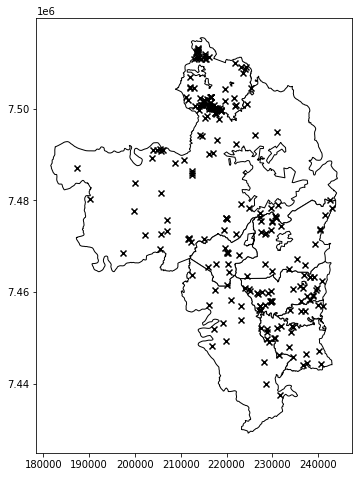

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
#ax.ticklabel_format(useOffset=False)
dv.perimetro_pira.plot(ax=ax, facecolor='w', edgecolor='k')
df.plot(ax=ax, marker='x', facecolor='k')
plt.show()

In [26]:
gdf_grid = gpd.GeoDataFrame(dv.genrerate_grid_with_cell(400, dv.perimetro_pira_dissolved), columns=['geometry'], crs = dv.perimetro_pira.crs)
gdf_grid['centroids'] = gdf_grid['geometry'].centroid
gdf_grid.head()

,geometry,centroids
0,"POLYGON ((182411.070 7486818.246, 182411.070 7...",POINT (182211.070 7487018.246)
1,"POLYGON ((182411.070 7487218.246, 182411.070 7...",POINT (182211.070 7487418.246)
2,"POLYGON ((182411.070 7487618.246, 182411.070 7...",POINT (182211.070 7487818.246)
3,"POLYGON ((182411.070 7488018.246, 182411.070 7...",POINT (182211.070 7488218.246)
4,"POLYGON ((182411.070 7488418.246, 182411.070 7...",POINT (182211.070 7488618.246)


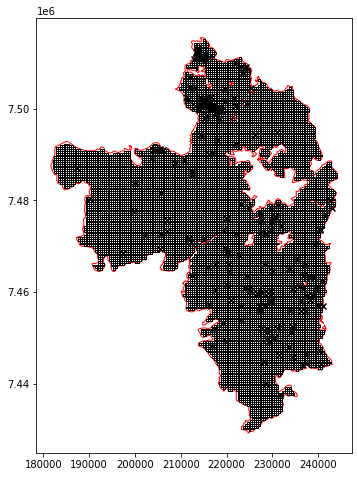

In [28]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.ticklabel_format(useOffset=False)
dv.perimetro_pira_dissolved.plot(ax=ax, facecolor='w', edgecolor='r')
df.plot(ax=ax, marker='x', facecolor='k')
gdf_grid.plot(ax=ax, facecolor = 'None', edgecolor='k')
plt.show()

In [29]:
x = df['geometry'].x
y = df['geometry'].y
z = df['argila']

xq = gdf_grid['centroids'].x
yq = gdf_grid['centroids'].y

# Arrange variables in griddata input format
points = (x,y)
values = z
xi = (xq, yq)

argila = griddata(points,
                    values,
                    xi,
                    method='cubic')

#Save interpolated data values into the geodataframe
gdf_grid['argila'] = argila.round(1)


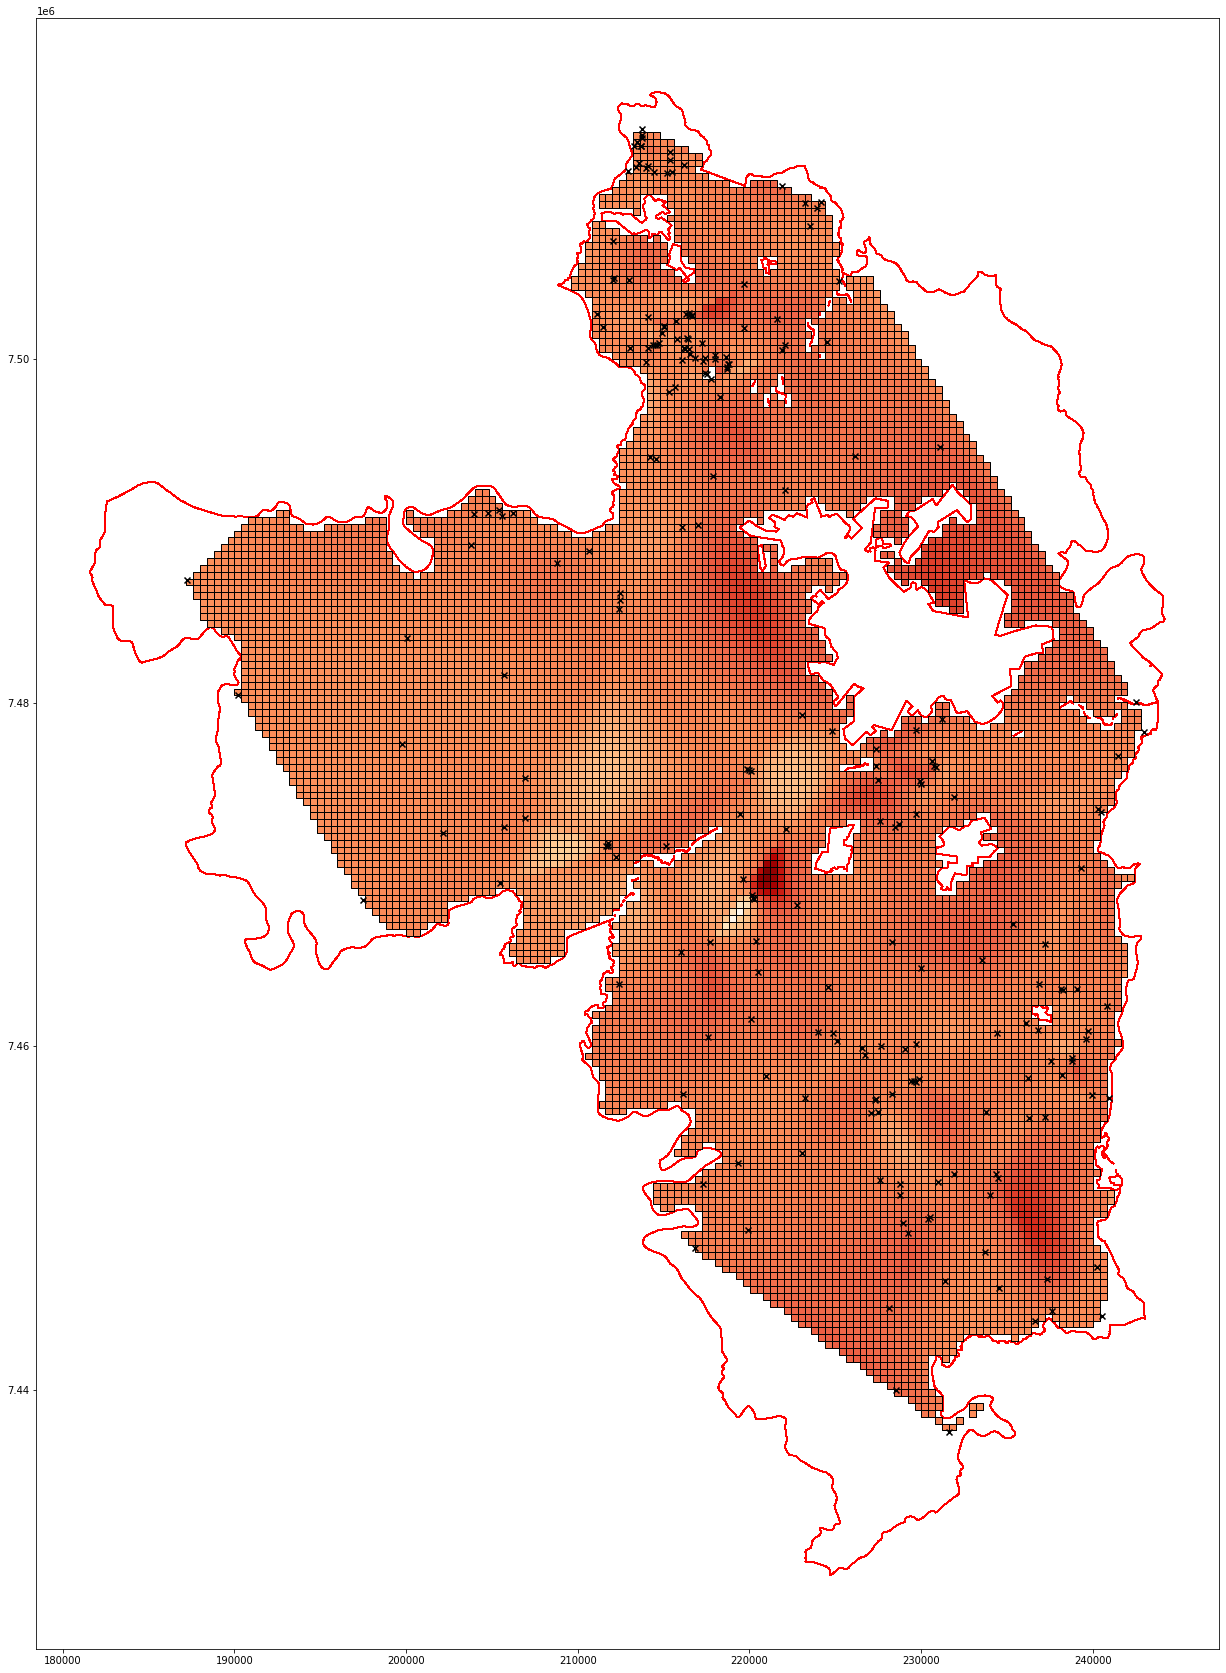

In [31]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(30,30))
ax.ticklabel_format(useOffset=False)
dv.perimetro_pira_dissolved.plot(ax=ax, facecolor='none', edgecolor='red', antialiased=False)
gdf_grid.plot(ax=ax, column='argila', edgecolor='black', cmap='OrRd', marker = '.')
df.plot(ax=ax, marker='x', facecolor='k')
plt.show()
